# Product Price Scraping & Analysis — Step by Step
This notebook guides you through loading a dataset, cleaning it, analyzing it, and visualizing results.

## Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Provide Dataset Path
Enter a CSV or Excel file path when prompted. Example: `data/products.csv`

In [3]:
file_path = input("Enter your dataset file name or path (CSV or Excel): ").strip()

if file_path.endswith('.csv'):
    df = pd.read_csv(file_path)
elif file_path.endswith('.xlsx'):
    df = pd.read_excel(file_path)
else:
    raise ValueError("Unsupported file type. Please upload a .csv or .xlsx file.")

print(f"Dataset '{file_path}' loaded successfully. Shape: {df.shape}")
try:
    display(df.head(10))
except Exception:
    print(df.head(10))


Dataset '/Users/prabhakar/Downloads/main/datasets/smartwatches_dataset.csv' loaded successfully. Shape: (50, 4)


,Product,Price,Rating,Category
0,Smartwatches Product 1,80691,3.4,Smartwatches
1,Smartwatches Product 2,20709,5.0,Smartwatches
2,Smartwatches Product 3,41177,3.3,Smartwatches
3,Smartwatches Product 4,37482,3.2,Smartwatches
4,Smartwatches Product 5,76011,4.1,Smartwatches
5,Smartwatches Product 6,78644,3.8,Smartwatches
6,Smartwatches Product 7,62872,4.2,Smartwatches
7,Smartwatches Product 8,66814,4.6,Smartwatches
8,Smartwatches Product 9,82844,4.9,Smartwatches
9,Smartwatches Product 10,21109,3.5,Smartwatches


## Step 3: Standardize Column Names
We will auto-detect common fields and rename them to `Product`, `Price`, `Rating`, `Category` if found.

In [4]:
rename_map = {}
for col in df.columns:
    lower = col.lower()
    if 'product' in lower or 'name' in lower:
        rename_map[col] = 'Product'
    elif 'price' in lower or 'cost' in lower:
        rename_map[col] = 'Price'
    elif 'rating' in lower or 'star' in lower:
        rename_map[col] = 'Rating'
    elif 'category' in lower:
        rename_map[col] = 'Category'

df.rename(columns=rename_map, inplace=True)
print("Columns after standardization:", list(df.columns))


Columns after standardization: ['Product', 'Price', 'Rating', 'Category']


## Step 4: Data Cleaning
- Clean `Price` by removing currency symbols and commas
- Convert `Rating` to numeric
- Drop duplicates
- Fill missing ratings with the mean

In [5]:
def clean_price(x):
    if pd.isna(x):
        return np.nan
    s = str(x).replace('₹', '').replace(',', '').strip()
    s = ''.join(ch for ch in s if (ch.isdigit() or ch == '.'))
    try:
        return float(s)
    except:
        return np.nan

if 'Price' in df.columns:
    df['Price'] = df['Price'].apply(clean_price)

if 'Rating' in df.columns:
    df['Rating'] = pd.to_numeric(df.get('Rating'), errors='coerce')

before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)

if 'Rating' in df.columns:
    df['Rating'].fillna(df['Rating'].mean(), inplace=True)

print(f"Cleaned data. Dropped {before - after} duplicates.")
print(df.info())
try:
    display(df.describe(include='all'))
except Exception:
    print(df.describe(include='all'))


Cleaned data. Dropped 0 duplicates.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   50 non-null     object 
 1   Price     50 non-null     float64
 2   Rating    50 non-null     float64
 3   Category  50 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.7+ KB
None


/var/folders/nk/d92pn72n1l17m_0fdfl3j2ww0000gn/T/ipykernel_3656/3711968862.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


,Product,Price,Rating,Category
count,50,50.000000,50.000000,50
unique,50,NaN,NaN,1
top,Smartwatches Product 1,NaN,NaN,Smartwatches
freq,1,NaN,NaN,50
mean,NaN,36880.320000,3.994000,NaN
std,NaN,28243.661127,0.579025,NaN
min,NaN,1933.000000,3.000000,NaN
25%,NaN,11293.750000,3.500000,NaN
50%,NaN,27441.500000,4.100000,NaN
75%,NaN,62583.000000,4.475000,NaN


## Step 5: Basic Statistical Analysis

In [6]:
if 'Price' in df.columns:
    avg_price = round(df['Price'].mean(), 2)
    highest_price = df['Price'].max()
    lowest_price = df['Price'].min()
else:
    avg_price = highest_price = lowest_price = None

if {'Price','Rating'}.issubset(df.columns):
    corr_pr = round(df['Price'].corr(df['Rating']), 3)
else:
    corr_pr = None

print('Summary Statistics:')
print(f"Average Price: ₹{avg_price}" if avg_price is not None else 'Average Price: N/A')
print(f"Highest Price: ₹{highest_price}" if highest_price is not None else 'Highest Price: N/A')
print(f"Lowest Price: ₹{lowest_price}" if lowest_price is not None else 'Lowest Price: N/A')
print(f"Correlation (Price vs Rating): {corr_pr}" if corr_pr is not None else 'Correlation (Price vs Rating): N/A')


Summary Statistics:
Average Price: ₹36880.32
Highest Price: ₹96723.0
Lowest Price: ₹1933.0
Correlation (Price vs Rating): -0.132


## Step 6: Visualizations
Enter one or more chart types separated by commas: `bar, scatter, histogram, pie, line, box, area, count`.

**Notes:**
- Uses matplotlib
- One chart per cell
- No specific colors or styles set

Available Chart Types: bar, scatter, histogram, pie, line, box, area, count
Generating pie chart...


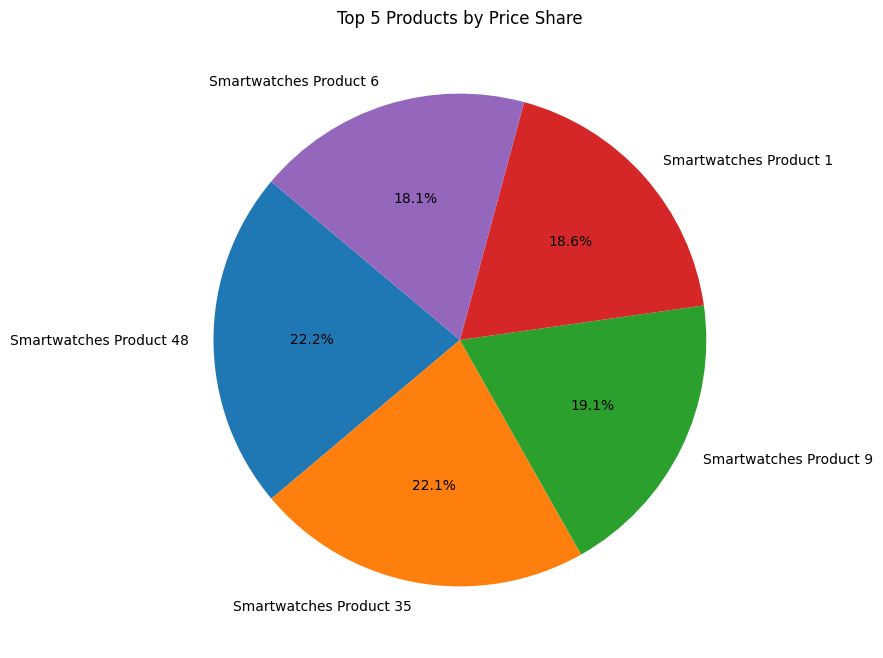

Generating bar chart...


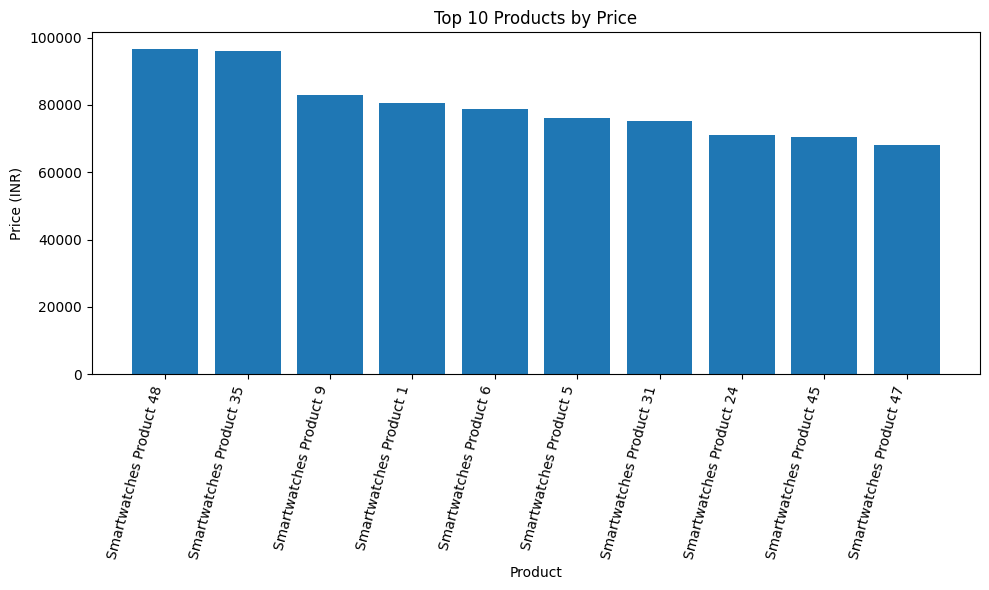

In [7]:
print("Available Chart Types: bar, scatter, histogram, pie, line, box, area, count")
chart_input = input("Enter chart types (comma separated): ").lower()

chart_types = [c.strip() for c in chart_input.split(',') if c.strip()]
if not chart_types:
    chart_types = ['bar']

for chart_type in chart_types:
    print(f"Generating {chart_type} chart...")

    if chart_type == 'bar' and {'Product','Price'}.issubset(df.columns):
        plt.figure(figsize=(10,6))
        df_sorted = df.sort_values('Price', ascending=False).head(10)
        plt.bar(df_sorted['Product'], df_sorted['Price'])
        plt.xticks(rotation=75, ha='right')
        plt.title('Top 10 Products by Price')
        plt.xlabel('Product')
        plt.ylabel('Price (INR)')
        plt.tight_layout()
        plt.show()

    elif chart_type == 'scatter' and {'Rating','Price'}.issubset(df.columns):
        plt.figure(figsize=(8,5))
        plt.scatter(df['Rating'], df['Price'])
        plt.title('Price vs Rating')
        plt.xlabel('Rating')
        plt.ylabel('Price (INR)')
        plt.show()

    elif chart_type == 'histogram' and 'Price' in df.columns:
        plt.figure(figsize=(8,5))
        plt.hist(df['Price'], bins=20, edgecolor='black')
        plt.title('Price Distribution')
        plt.xlabel('Price (INR)')
        plt.ylabel('Frequency')
        plt.show()

    elif chart_type == 'pie' and {'Product','Price'}.issubset(df.columns):
        plt.figure(figsize=(8,8))
        df_top = df.sort_values('Price', ascending=False).head(5)
        plt.pie(df_top['Price'], labels=df_top['Product'], autopct='%1.1f%%', startangle=140)
        plt.title('Top 5 Products by Price Share')
        plt.show()

    elif chart_type == 'line' and {'Product','Price'}.issubset(df.columns):
        plt.figure(figsize=(10,6))
        df_sorted = df.sort_values('Price', ascending=False).head(15)
        plt.plot(df_sorted['Product'], df_sorted['Price'], marker='o', linestyle='-')
        plt.xticks(rotation=75, ha='right')
        plt.title('Line Chart of Product Prices')
        plt.xlabel('Product')
        plt.ylabel('Price (INR)')
        plt.tight_layout()
        plt.show()

    elif chart_type == 'box' and 'Price' in df.columns:
        plt.figure(figsize=(8,5))
        plt.boxplot(df['Price'], patch_artist=True)
        plt.title('Box Plot of Product Prices')
        plt.ylabel('Price (INR)')
        plt.show()

    elif chart_type == 'area' and 'Price' in df.columns:
        plt.figure(figsize=(10,6))
        df_sorted = df.sort_values('Price', ascending=False).head(15)
        plt.fill_between(range(len(df_sorted)), df_sorted['Price'], alpha=0.5)
        plt.plot(df_sorted['Price'], linewidth=2)
        plt.title('Area Chart of Product Prices')
        plt.xlabel('Top Products')
        plt.ylabel('Price (INR)')
        plt.show()

    elif chart_type == 'count' and 'Category' in df.columns:
        plt.figure(figsize=(8,5))
        df['Category'].value_counts().plot(kind='bar')
        plt.title('Count of Products by Category')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping {chart_type}. Required columns are missing or invalid chart type.")


## Step 7: Save the Cleaned Dataset

In [8]:
output_file = 'cleaned_product_data.csv'
df.to_csv(output_file, index=False)
print(f"Cleaned dataset saved as '{output_file}'.")


Cleaned dataset saved as 'cleaned_product_data.csv'.
